<a href="https://colab.research.google.com/github/invegat/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [2]:
!pip install -U matplotlib


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
%matplotlib inline
import matplotlib
matplotlib.__version__

'3.0.2'

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


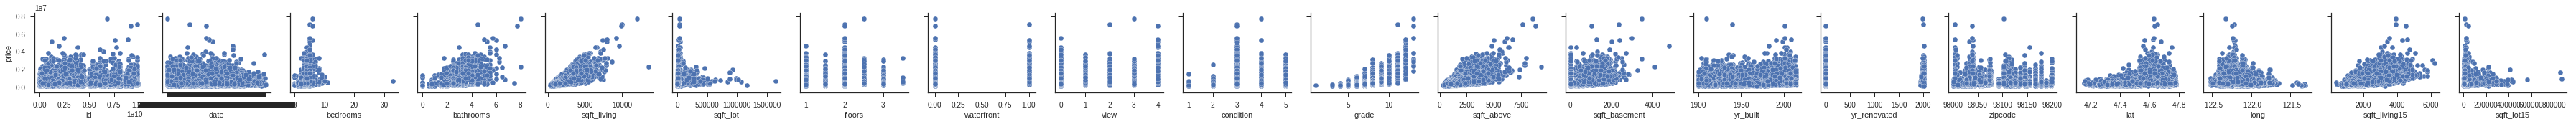

In [78]:
sns.set(style='ticks', color_codes=True)
dependant_columns = df.columns.drop('price')
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=dependant_columns);

In [0]:

price = df.price
dfxp = df.drop('price',inplace=False, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(dfxp, price, test_size=.5, random_state=42)

In [46]:

# Remember the convention of using a capital X for our x values and a lowercase y? 
# This is because typically we will have more than one x variable
# and our X dataframe will be a matrix rather than a vector.

X = X_train['bathrooms'].values[:, np.newaxis]
y = Y_train.values

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)

(10806, 1)
(10806,)


In [47]:


model = LinearRegression()
model.fit(X, y)

print("Slope Coefficient: ", model.coef_[0])
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  240296.9866877791

Intercept Value:  28306.06679286738


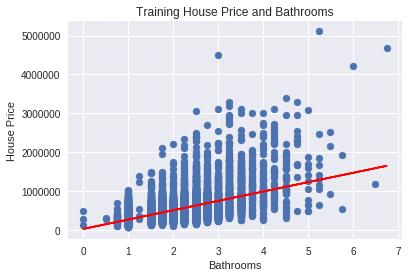

In [48]:

m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(X_train.bathrooms, Y_train)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X_train.bathrooms.values]
plt.plot(X_train.bathrooms, y_hat,c='r')

# Graph axes and title
plt.ylabel("House Price")
plt.xlabel("Bathrooms")
plt.title("Training House Price and Bathrooms")
plt.show()

In [52]:
y_test_predict = model.predict(X_test.bathrooms.values.reshape(-1, 1))

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print(f'Bathrooms - Price\nMSE is {MSE}')
print(f'RMSE is {RMSE}')

R2 = r2_score(Y_test, y_test_predict)

print(f'R^2 is {R2}')

Bathrooms - Price
MSE is 108328650154.85538
RMSE is 329133.17996649223
R^2 is 0.2727289287491844


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [75]:

X = X_train[['bathrooms','sqft_living']]
y = Y_train.values

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)
model.fit(X, y)
print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)
	

(10806, 2)
(10806,)
Slope Coefficient:  [1460.38026342  267.508047  ]

Intercept Value:  -21808.80450270546


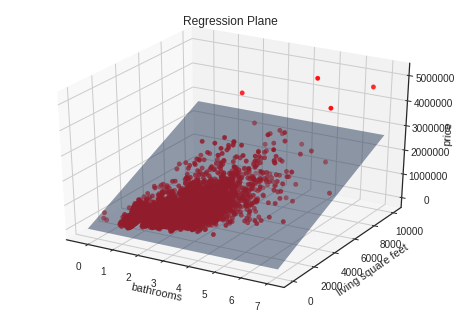

In [83]:

m_bathrooms_hat = model.coef_[0]
m_sqft_living_hat = model.coef_[1]
b_hat = model.intercept_
# y_hat = [m_bathrooms_hat*x_bathroom + m_sqft_living_hat*x_sqft_living + b_hat for x_bathroom,x_sqft_living in 
#          X_train[['bathrooms','sqft_living']].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_train['bathrooms'], X_train['sqft_living'], Y_train,c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = m_bathrooms_hat*xx + m_sqft_living_hat*yy + b_hat        


# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")
ax.set(xlabel='bathrooms', ylabel='living square feet', zlabel='price')
plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
